# EWMPCA

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}


Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

# read the equity_indices
df = read_parquet('./data/equity_indices.parquet')

In [3]:
df = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31 23:59:59",];

In [4]:
head(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [5]:
tail(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
81766,0,-0.0010771509,0.0002614949,0,0,-0.0035443728,-0.0003043677,0,0.0000331686,2020-12-31 06:00:00
81767,0,0.0014152851,0.0018299856,0,0,0.0017784900,0.0003044603,0,0.0011276949,2020-12-31 07:00:00
81768,0,-0.0003364964,-0.0006523725,0,0,-0.0007023294,-0.0006087354,0,-0.0003975616,2020-12-31 08:00:00
81769,0,0.0028948431,0.0021324745,0,0,0.0020303776,0.0018273184,0,0.0031154713,2020-12-31 09:00:00
81770,0,0.0028193596,-0.0021713641,0,0,0.0021821299,-0.0012159903,0,0.0029405934,2020-12-31 10:00:00
81771,0,0.0011379610,0.0027853941,0,0,0.0010303667,0.0020798458,0,0.0004612090,2020-12-31 11:00:00


In [6]:
Z = prcomp(df[,1:9], retx = TRUE)

In [7]:
classical_pca = Z$x;

In [8]:
head(classical_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
2231,0.0004218708,0.0005528499,9.158623e-05,-1.294391e-04,0.0007411066,-2.010741e-04,0.0008864193,0.0005319342,-0.0010451609
2232,-0.0001537578,-0.0001379960,-2.403844e-05,2.731519e-05,-0.0001632364,4.058322e-05,-0.0001762440,-0.0001094920,0.0002215886
2233,0.0001211958,0.0001919921,3.119062e-05,-4.755978e-05,0.0002687304,-7.484637e-05,0.0003313457,0.0001968904,-0.0003834845
2234,-0.0002786417,-0.0002878765,-4.912345e-05,6.132338e-05,-0.0003594355,9.301129e-05,-0.0004067911,-0.0002486508,0.0004964126
2235,-0.0005288763,-0.0005881978,-9.938727e-05,1.294669e-04,-0.0007525673,1.980634e-04,-0.0008687472,-0.0005274886,0.0010470879
2236,-0.0003794449,-0.0004088564,-6.937146e-05,8.877395e-05,-0.0005178027,1.353299e-04,-0.0005928831,-0.0003609764,0.0007182438


In [40]:
source("xpca.R")

In [10]:
minLimit = min(dim(df)[1], 100);
cov_init = cov(df[1:minLimit,1:9]);
W_init = sorted_eig(cov_init);

[1] "eigen values:"
[1] -4.235165e-22  2.354068e-07  4.914251e-07  1.022780e-06  1.291535e-06
[6]  3.404366e-06  5.071879e-06  1.660871e-05  7.202036e-05
[1] "eigen vectors:"
            [,1]        [,2]          [,3]          [,4]          [,5]
 [1,] -0.1996741  0.07645926  1.983089e-01  4.841814e-01 -8.637406e-02
 [2,] -0.3372554  0.09022704 -3.775480e-01 -3.033985e-04 -2.638490e-01
 [3,] -0.3914986  0.03247891 -2.835584e-01 -3.244092e-01 -5.313739e-02
 [4,] -0.3387562  0.13546927  1.213399e-01  6.766690e-01  2.715568e-01
 [5,]  0.0000000  0.00000000 -1.110223e-16  5.551115e-17 -7.216450e-16
 [6,] -0.3999386  0.10536006 -3.932606e-01 -1.255838e-01  6.302252e-01
 [7,] -0.3330048 -0.92770945  1.511169e-01 -5.444671e-03  6.989420e-03
 [8,] -0.4449276  0.29172639  7.193356e-01 -4.161549e-01  5.571709e-03
 [9,] -0.3309962  0.09877456 -1.675363e-01  1.160182e-01 -6.701439e-01
               [,6]          [,7]          [,8]          [,9]
 [1,]  1.639014e-01  7.857331e-01 -1.697808e-01  0.00

In [11]:
W_init

-0.1996741,0.07645926,1.983089e-01,4.841814e-01,-8.637406e-02,1.639014e-01,7.857331e-01,-1.697808e-01,0.000000e+00
-0.3372554,0.09022704,-3.775480e-01,-3.033985e-04,-2.638490e-01,-5.766015e-02,-1.871674e-01,-7.922138e-01,1.177048e-16
-0.3914986,0.03247891,-2.835584e-01,-3.244092e-01,-5.313739e-02,7.677593e-01,5.767403e-02,2.538169e-01,-8.991416e-16
-0.3387562,0.13546927,1.213399e-01,6.766690e-01,2.715568e-01,1.699031e-01,-5.258815e-01,1.229903e-01,-5.227561e-16
0.0000000,0.00000000,-1.110223e-16,5.551115e-17,-7.216450e-16,-8.881784e-16,1.526557e-16,5.551115e-17,-1.000000e+00
-0.3999386,0.10536006,-3.932606e-01,-1.255838e-01,6.302252e-01,-4.254085e-01,2.511750e-01,1.314464e-01,4.407229e-17
-0.3330048,-0.92770945,1.511169e-01,-5.444671e-03,6.989420e-03,-6.556450e-02,-2.085652e-02,-2.853914e-02,7.987552e-17
-0.4449276,0.29172639,7.193356e-01,-4.161549e-01,5.571709e-03,-1.115874e-01,-6.398850e-02,-9.863625e-02,1.009390e-16
-0.3309962,0.09877456,-1.675363e-01,1.160182e-01,-6.701439e-01,-3.921319e-01,-9.788791e-03,4.860045e-01,1.209388e-15


In [12]:
ewm_pca = ewmpca(df[,1:9], 0.9305, W_init);

In [13]:
dim(ewm_pca);

[1] 79541     9

In [20]:
head(ewm_pca);

0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000e+00,0.000000e+00,0.000000e+00
0.0013758320,-0.0009977866,0.0008050623,0.0006795483,0.0003439586,-0.0002381899,-2.027881e-04,2.009678e-05,-2.482921e-18
0.0006230344,-0.0004518396,0.0003645659,0.0003077280,0.0001557589,-0.0001078624,-9.183095e-05,9.100662e-06,-1.124371e-18
0.0015354005,-0.0011135095,0.0008984331,0.0007583621,0.0003838508,-0.0002658151,-2.263074e-04,2.242759e-05,-2.770889e-18
0.0020267854,-0.0014698737,0.0011859649,0.0010010660,0.0005066972,-0.0003508858,-2.987341e-04,2.960525e-05,-3.657676e-18
0.0015287621,-0.0011086952,0.0008945487,0.0007550833,0.0003821912,-0.0002646659,-2.253289e-04,2.233063e-05,-2.758909e-18


In [21]:
dim(ewm_pca)

[1] 79541     9

In [22]:
tail(ewm_pca)

"[79536,]",-7.533954e-04,-0.0002514459,0.0011397159,0.0022881011,1.603361e-03,-1.443658e-03,-0.0004893160,-2.641910e-04,1.358219e-04
"[79537,]",-4.311537e-04,-0.0004292219,-0.0008838883,-0.0026239168,6.134611e-05,-6.550804e-05,0.0009987488,-9.206814e-04,-8.493542e-05
"[79538,]",-4.953332e-05,0.0006657710,0.0009374639,0.0006255709,3.177632e-05,1.304571e-04,-0.0003008416,3.559571e-06,-1.651637e-05
"[79539,]",-9.489524e-04,-0.0013470811,-0.0040818245,-0.0011291855,-1.285528e-03,2.082336e-03,-0.0001432652,1.103848e-04,-7.119528e-05
"[79540,]",1.968542e-03,0.0009205749,-0.0030237084,0.0016207365,2.287377e-03,-8.680407e-04,-0.0003014496,9.472875e-04,6.832107e-04
"[79541,]",-1.902799e-03,-0.0013218257,-0.0014641311,-0.0016316129,3.196796e-05,1.331099e-05,-0.0001504626,-6.654752e-04,-6.860362e-04


In [23]:
cross_cov = cov(classical_pca, ewm_pca)

In [24]:
cross_cov

PC1,-2.002646e-05,-2.184474e-05,-2.181112e-06,-6.763914e-06,-5.829229e-06,-4.227395e-06,-8.938585e-07,-4.352887e-07,7.749326e-07
PC2,-1.110719e-05,-3.092959e-06,-1.016909e-06,1.373808e-06,9.718758e-07,1.163416e-06,4.072591e-07,1.371735e-07,3.403540e-07
PC3,-5.544212e-06,2.165081e-06,3.479950e-06,2.194554e-06,1.793563e-06,1.005643e-06,2.023866e-07,9.749444e-08,-2.856986e-07
PC4,4.098608e-06,-9.950371e-07,-1.288935e-07,-2.139843e-07,-1.516466e-07,-1.690192e-07,-2.431578e-07,-2.244919e-07,-3.752468e-08
PC5,1.141113e-06,1.562605e-07,-8.309182e-08,-1.341122e-07,-1.553698e-07,-1.871377e-07,1.305326e-07,1.669388e-07,2.286433e-07
PC6,-3.798346e-07,1.786373e-07,1.254343e-07,1.275952e-07,8.339232e-08,-6.618115e-08,1.588503e-07,1.229831e-07,1.009181e-07
PC7,2.243307e-06,-6.088293e-07,1.651378e-07,-5.522903e-08,-7.538519e-08,-1.397142e-07,-2.441408e-07,-1.005888e-07,-1.826134e-08
PC8,-1.336396e-06,1.075869e-07,-4.547813e-07,-5.898290e-08,-9.985274e-08,-8.852147e-08,-1.922821e-07,-1.374290e-07,-1.373800e-07
PC9,-5.722252e-08,-3.812968e-08,-2.670693e-08,4.685125e-09,1.676822e-08,6.630602e-09,-1.234026e-08,-4.324043e-08,-1.297766e-07


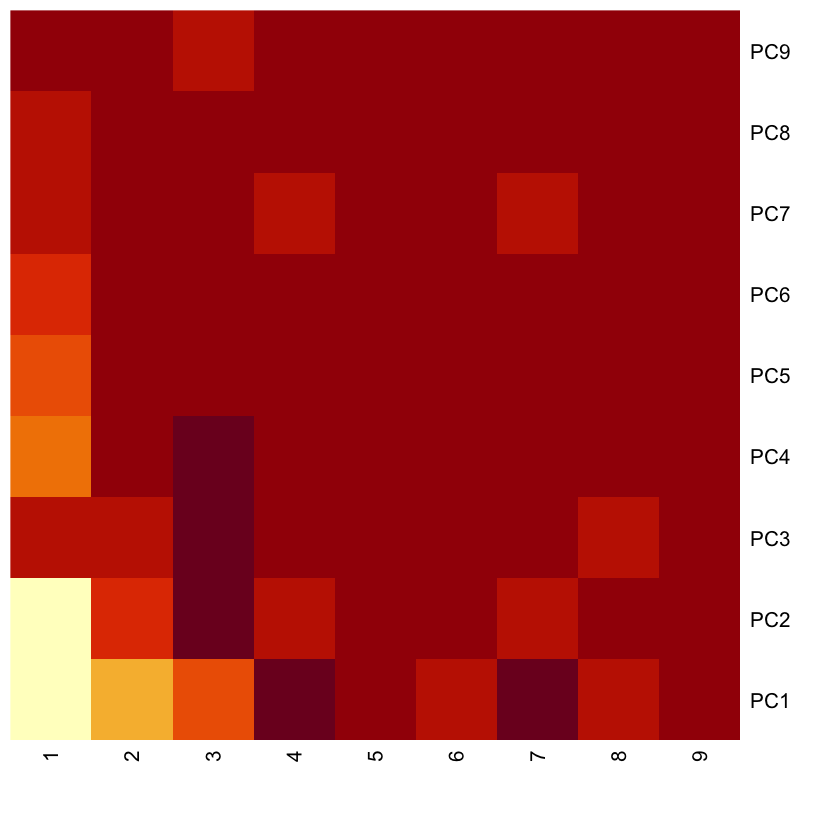

In [25]:
# options(repr.plot.width=18, repr.plot.height=6)
# par(mfrow=c(1,3));
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)

In [26]:
cross_cov

PC1,-2.002646e-05,-2.184474e-05,-2.181112e-06,-6.763914e-06,-5.829229e-06,-4.227395e-06,-8.938585e-07,-4.352887e-07,7.749326e-07
PC2,-1.110719e-05,-3.092959e-06,-1.016909e-06,1.373808e-06,9.718758e-07,1.163416e-06,4.072591e-07,1.371735e-07,3.403540e-07
PC3,-5.544212e-06,2.165081e-06,3.479950e-06,2.194554e-06,1.793563e-06,1.005643e-06,2.023866e-07,9.749444e-08,-2.856986e-07
PC4,4.098608e-06,-9.950371e-07,-1.288935e-07,-2.139843e-07,-1.516466e-07,-1.690192e-07,-2.431578e-07,-2.244919e-07,-3.752468e-08
PC5,1.141113e-06,1.562605e-07,-8.309182e-08,-1.341122e-07,-1.553698e-07,-1.871377e-07,1.305326e-07,1.669388e-07,2.286433e-07
PC6,-3.798346e-07,1.786373e-07,1.254343e-07,1.275952e-07,8.339232e-08,-6.618115e-08,1.588503e-07,1.229831e-07,1.009181e-07
PC7,2.243307e-06,-6.088293e-07,1.651378e-07,-5.522903e-08,-7.538519e-08,-1.397142e-07,-2.441408e-07,-1.005888e-07,-1.826134e-08
PC8,-1.336396e-06,1.075869e-07,-4.547813e-07,-5.898290e-08,-9.985274e-08,-8.852147e-08,-1.922821e-07,-1.374290e-07,-1.373800e-07
PC9,-5.722252e-08,-3.812968e-08,-2.670693e-08,4.685125e-09,1.676822e-08,6.630602e-09,-1.234026e-08,-4.324043e-08,-1.297766e-07


In [44]:

cov_to_cor = function(cov) {
  v = sqrt(diag(as.matrix(cov)));
  v = matrix(v, ncol = 1);
  outer_v = v %*% t(v);
  corr = cov / outer_v;
  return(corr);
}

In [45]:
cross_corr = cov_to_cor(cross_cov);

Warning message in sqrt(diag(as.matrix(cov))):
“NaNs produced”


In [46]:
sqrt(diag(as.matrix(cross_cov)));

Warning message in sqrt(diag(as.matrix(cross_cov))):
“NaNs produced”


[1]         NaN         NaN 0.001865462         NaN         NaN         NaN
[7]         NaN         NaN         NaN

In [50]:
diag(as.matrix(cross_cov));

[1] -2.002646e-05 -3.092959e-06  3.479950e-06 -2.139843e-07 -1.553698e-07
[6] -6.618115e-08 -2.441408e-07 -1.374290e-07 -1.297766e-07

In [39]:
dim(cross_cov)

[1] 9 9

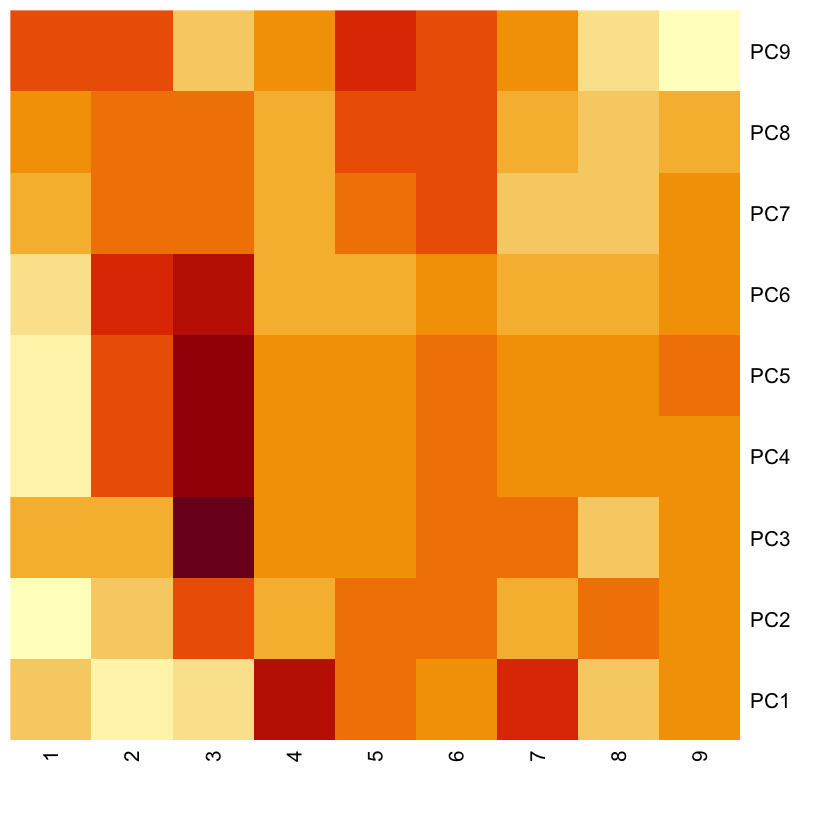

In [33]:
heatmap(cross_corr, Colv = NA, Rowv = NA, symm = TRUE)